# TORX Data

In this code, the 100x100 database is scraped.  Two CSVs were created. First dataset is  a summary of all runners and their information. Runners are only repeated if they ran TOR  a different year! 

The second dataset contains the time stamp of their arrival into the lifebase/aidstation. Although it is easier for humans to understand if the aid stations were columns,  for the sake of cleaning the dataset, I have decided to keep the format because I will later work with cleaning 'time' and 'place' columns. Pivoting the dataset would make the cleaning process more difficult but eventually the aid stations will be column names and the contains of the columns will be the time stamp.    

First CSV
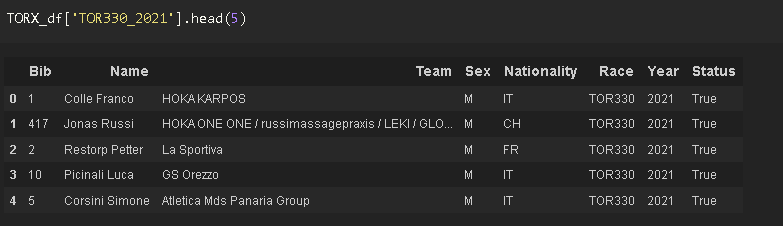

Second CSV
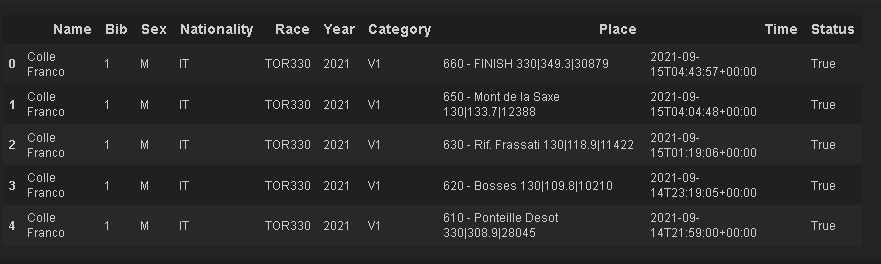

Second CSV contains the lifebase/ aid station.

In [1]:
import requests
import json
import html
import pandas as pd
import time
import re
import unicodedata

C:\Users\Karina\miniconda3\lib\site-packages\requests\__init__.py:109: RequestsDependencyWarning: urllib3 (2.2.2) or chardet (3.0.4)/charset_normalizer (2.0.4) doesn't match a supported version!
  warnings.warn(


In [2]:
years = ['2021','2022', '2023',  '2024']
races = ['TOR330' ,
#          'TOR450',
#          'TOR130'
        ]
delay_seconds = 15

## Scraping TORX Data from the website

In [3]:
for race in races:
    for year in years:
        # URL of the JSON file
        url = f'https://100x100trail.com/json/{race}{year}.json'
        print(url)

        # Send a GET request to fetch the JSON data
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Parse the JSON data
            data = response.json()

            # Optionally, save the data to a JSON file
            with open(f'{race} Data/100x100trail/JSON/{race}_{year}.json', 'w') as f:
                json.dump(data, f, indent=4)

            print(f"Data saved to '{race}_{year}.json'")
        else:
            print(f"Failed to retrieve data. Status code: {response.status_code}")

        time.sleep(delay_seconds)

https://100x100trail.com/json/TOR3302021.json
Data saved to 'TOR330_2021.json'
https://100x100trail.com/json/TOR3302022.json
Data saved to 'TOR330_2022.json'
https://100x100trail.com/json/TOR3302023.json
Data saved to 'TOR330_2023.json'
https://100x100trail.com/json/TOR3302024.json
Data saved to 'TOR330_2024.json'


## Extracting Data from JSON data

In [4]:
# Prepare a list to hold the rows for the DataFrame
rows = []
aid_station_list = []

# Function to parse each entry
def parse_data(entries, race, year):
    n = 0
    for entry in entries:
        
        attributes = entry["data"]["attributes"]
        name = html.unescape(attributes["name"]).title()
        team = attributes["team"]
        bib_number = attributes["pettorale"]
        sex = attributes["sesso"]
        nationality = attributes["nazionalita"]
        category = attributes["categoria"]
        finisher_status = attributes["finisher"]
        
        race = f'{race}'
        year = f'{year}'
        
        #"Bib", "Name", "Team", "Sex",  'Nationality','Race', 'Status' 
        all_info = [ bib_number, name, team, sex, nationality, race,year, finisher_status ]
        # Append the row to the list
        rows.append(all_info)

        # Extracting times and places
        events = entry["data"]["relationships"]["events"]["data"]

        for event in events:
            place = event['title']
            time = event['start_date']

            aid_station_info = [name, bib_number,  sex, nationality,race,year,
                                category, place, time, finisher_status]
        
#             print(aid_station_info)
            aid_station_list.append(aid_station_info)



In [5]:
# Function to remove special characters
def normalize_name(name):
    # Normalize to remove accents and special characters
    name = unicodedata.normalize('NFD', name)
    # Encode to ASCII and ignore errors, then decode back to string
    name = name.encode('ascii', 'ignore').decode('utf-8')
    return name

## Looping through scraped data

In [6]:
TORX_df = {}
aid_station_TORX_df = {}


for race in races:
    for year in years:
        rows=[]
        aid_station_list = []

        # Load the JSON data from a file
        with open(f'{race} Data/100x100trail/JSON/{race}_{year}.json', 'r') as file:
            data = json.load(file)

            # parse data
            parse_data(data, race, year)

            # Create a DataFrame
            df = pd.DataFrame(rows, columns=[
        #        bib_number, name, team, gender, nationality, race, finisher_status
               "Bib", "Name", "Team", "Sex",  'Nationality','Race','Year',  'Status' ])
            
#             print(df.info())

            # Create a DataFrame
            aid_station_df = pd.DataFrame(aid_station_list, columns=[
        #    name, bib_number,  sex, nationality,race,year,
#           category, place, time, finisher_status
               "Name", "Bib", 'Sex', 'Nationality','Race', 'Year',
                "Category",  'Place', 'Time', 'Status' ])    
            
            datasets = [df, aid_station_df]
            
            for dataset in datasets:
                dataset['Name'] = dataset['Name'].str.strip().str.title()
                dataset['Name'] = dataset['Name'].str.replace(',', '')
                dataset['Name'] = dataset['Name'].str.replace('\'', ' ')
                dataset['Name'] = dataset['Name'].str.replace('-', ' ')
                dataset['Name'] = dataset['Name'].str.replace(r"\s+", " ")
                dataset['Name'] = dataset['Name'].apply(normalize_name)
                
            
            df.to_excel(f'{race} Data/100x100trail/{race}_{year}.xlsx' , index = False)
            aid_station_df.to_excel(f'{race} Data/100x100trail/aid_station_{race}_{year}.xlsx' , index = False)
            
            TORX_df[f'{race}_{year}'] = df
            aid_station_TORX_df[f'{race}_{year}'] = aid_station_df
                
            print(f"Data saved to f'{race}_{year}.xlsx'")

            print('*'*30)



C:\Users\Karina\AppData\Local\Temp\ipykernel_23252\1562166602.py:38: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Name'] = dataset['Name'].str.replace(r"\s+", " ")


Data saved to f'TOR330_2021.xlsx'
******************************


C:\Users\Karina\AppData\Local\Temp\ipykernel_23252\1562166602.py:38: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Name'] = dataset['Name'].str.replace(r"\s+", " ")


Data saved to f'TOR330_2022.xlsx'
******************************


C:\Users\Karina\AppData\Local\Temp\ipykernel_23252\1562166602.py:38: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Name'] = dataset['Name'].str.replace(r"\s+", " ")


Data saved to f'TOR330_2023.xlsx'
******************************


C:\Users\Karina\AppData\Local\Temp\ipykernel_23252\1562166602.py:38: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Name'] = dataset['Name'].str.replace(r"\s+", " ")


Data saved to f'TOR330_2024.xlsx'
******************************


In [11]:
TORX_df['TOR330_2021'].head(5)

,Bib,Name,Team,Sex,Nationality,Race,Year,Status
0,1,Colle Franco,HOKA KARPOS,M,IT,TOR330,2021,True
1,417,Jonas Russi,HOKA ONE ONE / russimassagepraxis / LEKI / GLO...,M,CH,TOR330,2021,True
2,2,Restorp Petter,La Sportiva,M,FR,TOR330,2021,True
3,10,Picinali Luca,GS Orezzo,M,IT,TOR330,2021,True
4,5,Corsini Simone,Atletica Mds Panaria Group,M,IT,TOR330,2021,True


In [10]:
aid_station_TORX_df['TOR330_2021'].head(5)

,Name,Bib,Sex,Nationality,Race,Year,Category,Place,Time,Status
0,Colle Franco,1,M,IT,TOR330,2021,V1,660 - FINISH 330|349.3|30879,2021-09-15T04:43:57+00:00,True
1,Colle Franco,1,M,IT,TOR330,2021,V1,650 - Mont de la Saxe 130|133.7|12388,2021-09-15T04:04:48+00:00,True
2,Colle Franco,1,M,IT,TOR330,2021,V1,630 - Rif. Frassati 130|118.9|11422,2021-09-15T01:19:06+00:00,True
3,Colle Franco,1,M,IT,TOR330,2021,V1,620 - Bosses 130|109.8|10210,2021-09-14T23:19:05+00:00,True
4,Colle Franco,1,M,IT,TOR330,2021,V1,610 - Ponteille Desot 330|308.9|28045,2021-09-14T21:59:00+00:00,True


# TORX Data

The data has to go through several cleaning processes

In [8]:
TORX_df = {}
aid_stations_TORX_df = {}

for race in races:
    for year in years:
        df =  TORX_df[f'{race}_{year}']
        print(f'{race}_{year} {df.shape}')
        try:
            for column in df.columns:
                df[column] = df[column].str.strip().str.title()
                df[column] = df[column].str.replace(',', '')
                df[column] = df[column].str.replace('\'', ' ')
                df[column] = df[column].str.replace('-', ' ')
                df[column] = df[column].str.replace(r"\s+", " ")
                df[column] = df[column].apply(normalize_name)
                
                df[column] = re.sub(r"\s+", " ", df[column]).strip().title()
                
                print(df.shape)
        except:
            pass

        # Store the DataFrame in the dictionary with a key like 'TOR330_2021'
        TORX_df[f'{race}_{year}'] = df
    print('*'*50)
        
#         print(f"Data read from f'{race}_{year}.xlsx'")


TOR330_2021 (712, 8)
TOR330_2022 (960, 8)
TOR330_2023 (1206, 8)
TOR330_2024 (1096, 8)
**************************************************
TOR450_2021 (56, 8)
TOR450_2022 (149, 8)
TOR450_2023 (187, 8)
TOR450_2024 (185, 8)
**************************************************
TOR130_2021 (264, 8)
TOR130_2022 (388, 8)
TOR130_2023 (505, 8)
TOR130_2024 (393, 8)
**************************************************


In [4]:
TORX_df_excel = pd.concat(TORX_df)
TORX_df_excel.to_excel(f'Database Data/TORX_df_100x100_trail.xlsx' , index = False)

In [5]:
TORX_df_excel

Bib              Name  \
TOR330_2021 0       1      Colle Franco   
            1     417      Jonas  Russi   
            2       2    Restorp Petter   
            3      10     Picinali Luca   
            4       5    Corsini Simone   
...               ...               ...   
TOR130_2024 388  2459   Petrella Sandro   
            389  2364      Puccini Dino   
            390  2225    Kovsca Stefano   
            391  2495      Lee Heewoong   
            392  2353  Sutherland Jason   

                                                              Team Sex  \
TOR330_2021 0                                         HOKA  KARPOS   M   
            1    HOKA ONE ONE / russimassagepraxis / LEKI / GLO...   M   
            2                                          La Sportiva   M   
            3                                           GS Orezzo    M   
            4                          Atletica Mds Panaria Group    M   
...                                                            ...  ..   
TOR130_2024 388                                                NaN   M   
            389                                TEAM MUD & SNOW ASD   M   
            390                                                NaN   M   
            391                                                NaN   M   
            392                                                NaN   M   

                Nationality    Race  Year  Status  
TOR330_2021 0            IT  TOR330  2021    True  
            1            CH  TOR330  2021    True  
            2            FR  TOR330  2021    True  
            3            IT  TOR330  2021    True  
            4            IT  TOR330  2021    True  
...                     ...     ...   ...     ...  
TOR130_2024 388          IT  TOR130  2024   False  
            389          IT  TOR130  2024   False  
            390          IT  TOR130  2024   False  
            391          KR  TOR130  2024   False  
            392          US  TOR130  2024   False  

[6101 rows x 8 columns]

### Exploring Data

In [6]:
# print(tor_des_glacier_df[f'tor_des_glacier_2024'])
df = TORX_df[f'TOR330_2024'][TORX_df[f'TOR330_2024']['Name'] == 'D Haene Francois']

df

,Bib,Name,Team,Sex,Nationality,Race,Year,Status
0,10,D Haene Francois,SALOMON INTERNATIONNAL,M,FR,TOR330,2024,True
